In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the CLEAN data
df = pd.read_csv('Clean Churn Data.csv')

In [3]:
df.head(5)

,customerid,churn,tenure,numberofaddress,ordercount,warehousetohome,daysincelastorder,orderamounthikefromlastyear,couponused,cashbackamount,...,preferredpaymentmode,gender,hourspendonapp,numberofdeviceregistered,preferedordercat,satisfactionscore,citytier,maritalstatus,complain,delivery_status
0,50001,1,4,9,1,6,5,11,1,160,...,Debit Card,Female,3,3,Laptop & Accessory,2,3,Single,1,On-Time
1,50002,1,0,7,1,8,0,15,0,121,...,UPI,Male,3,4,Mobile Phone,1,1,Single,1,On-Time
2,50003,1,0,6,1,30,3,14,0,120,...,Debit Card,Male,2,4,Mobile Phone,1,1,Single,1,On-Time
3,50004,1,0,8,1,15,3,23,0,134,...,Debit Card,Male,2,4,Laptop & Accessory,2,3,Single,0,On-Time
4,50005,1,0,3,1,12,3,11,1,130,...,Credit Card,Male,0,3,Mobile Phone,2,1,Single,0,On-Time


In [4]:
df.describe()

,customerid,churn,tenure,numberofaddress,ordercount,warehousetohome,daysincelastorder,orderamounthikefromlastyear,couponused,cashbackamount,hourspendonapp,numberofdeviceregistered,satisfactionscore,citytier,complain
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.208348,9.712078,4.214032,2.870160,14.942629,4.295737,14.968561,1.671403,177.221492,2.798757,3.688988,3.257371,1.654707,0.284902
std,1625.385339,0.406163,8.627486,2.583586,2.939615,8.942111,3.700134,4.893091,1.886648,49.193869,0.932334,1.023999,1.280799,0.915389,0.451408
min,50001.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,51408.250000,0.000000,1.000000,2.000000,1.000000,9.000000,1.000000,13.000000,1.000000,146.000000,2.000000,3.000000,2.000000,1.000000,0.000000
50%,52815.500000,0.000000,8.000000,3.000000,2.000000,13.000000,3.000000,14.000000,1.000000,163.000000,3.000000,4.000000,3.000000,1.000000,0.000000
75%,54222.750000,0.000000,15.000000,6.000000,3.000000,20.000000,7.000000,18.000000,2.000000,196.000000,3.000000,4.000000,4.000000,3.000000,1.000000
max,55630.000000,1.000000,61.000000,22.000000,16.000000,127.000000,46.000000,26.000000,16.000000,325.000000,5.000000,6.000000,5.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   customerid                   5630 non-null   int64 
 1   churn                        5630 non-null   int64 
 2   tenure                       5630 non-null   int64 
 3   numberofaddress              5630 non-null   int64 
 4   ordercount                   5630 non-null   int64 
 5   warehousetohome              5630 non-null   int64 
 6   daysincelastorder            5630 non-null   int64 
 7   orderamounthikefromlastyear  5630 non-null   int64 
 8   couponused                   5630 non-null   int64 
 9   cashbackamount               5630 non-null   int64 
 10  preferredlogindevice         5630 non-null   object
 11  preferredpaymentmode         5630 non-null   object
 12  gender                       5630 non-null   object
 13  hourspendonapp               5630

In [6]:
#Verify the "Late Delivery" Impact 
#We group by Delivery Status and calculate the average churn (which gives us the rate)
churn_by_delivery = df.groupby('delivery_status')['churn'].mean() * 100

In [7]:
churn_by_delivery

delivery_status
Late       39.935065
On-Time    19.729425
Name: churn, dtype: float64

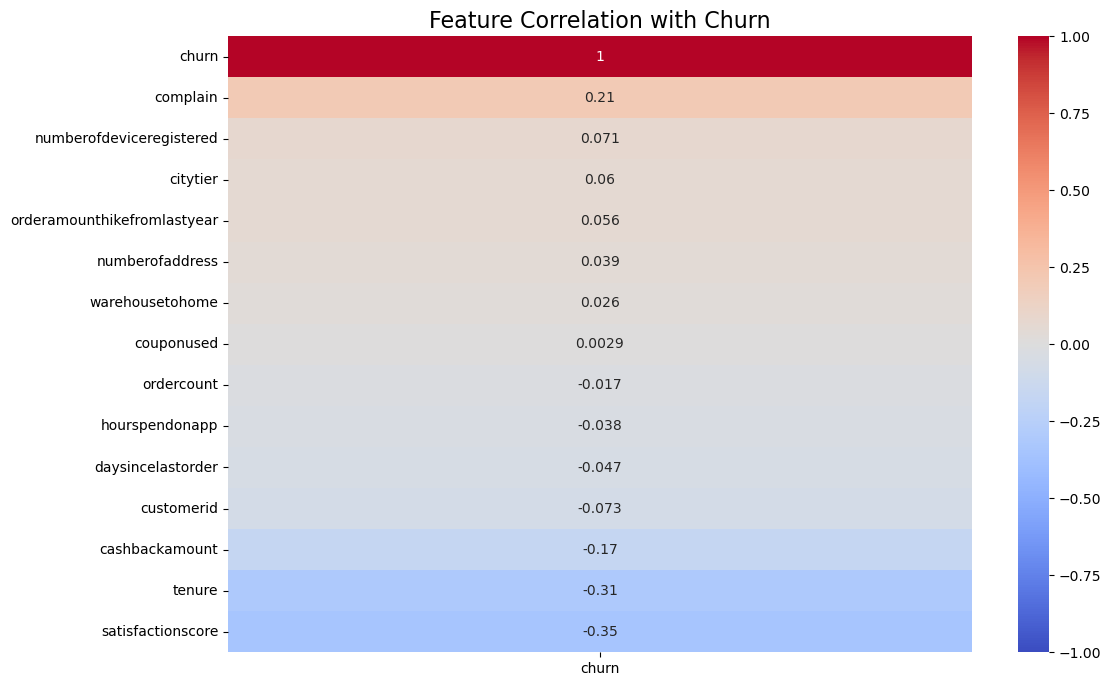

In [8]:
#What are the top factors driving churn?
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])
# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Visualize it
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['churn']].sort_values(by='churn', ascending=False),
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1)
plt.title('Feature Correlation with Churn', fontsize=16)
plt.show()

* **The "Happiness" Factor (Satisfaction Score: -0.35)**  Dissatisfaction is the #1 reason people leave. This validates that the customer feedback surveys are accurate and actionable.
* **The "Loyalty" Factor (Tenure: -0.31)**  The "Danger Zone" is the first few months. Once a customer survives the initial period (onboarding), they become loyal.
* **The "Money" Factor (Cashback Amount: -0.17)**  Financial incentives work. Increasing cashback is a valid lever to pull if you want to save an at-risk customer.

* **Complain (+0.21):**
      *Theory*: This is obvious when complain will rise churn will be more.

* **Number of Devices Registered (+0.071):**
    *Theory*: Customers with too many devices might be facing login/sync issues (technical friction), or they might be "power users" who shop around on multiple platforms to compare prices.
  
* **City Tier (+0.06):**
    *Theory*: Customers in Tier 1 cities (big metros) might churn more because they have more alternatives (Amazon, Flipkart, Blinkit) compared to Tier 3 cities where options are limited.

* **Order Amount Hike (+0.056):**
    *Theory*: If you raise prices (hike), people leave. This confirms customers are price-sensitive.

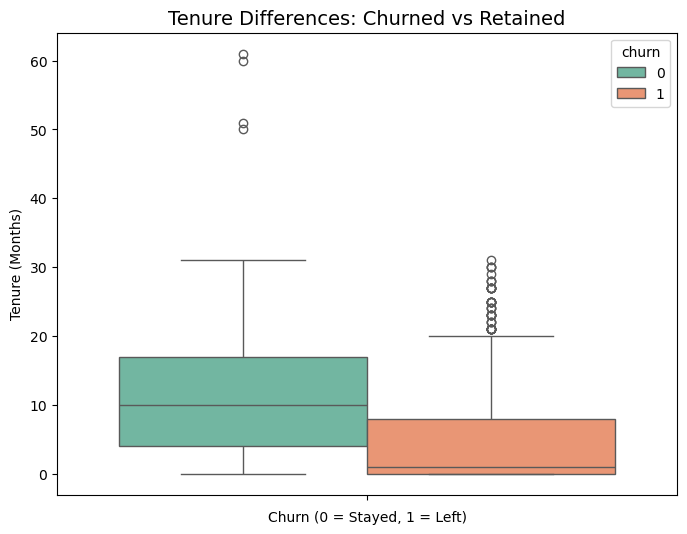

In [9]:
# Create a Boxplot to see the distribution
plt.figure(figsize=(8, 6))
sns.boxplot(hue='churn', y='tenure', data=df, palette='Set2')
plt.title('Tenure Differences: Churned vs Retained', fontsize=14)
plt.xlabel('Churn (0 = Stayed, 1 = Left)')
plt.ylabel('Tenure (Months)')
plt.show()

preferedordercat
Mobile Phone          32.067308
Fashion               18.159806
Laptop & Accessory    14.195122
Grocery               11.463415
Others                 6.818182
Name: churn, dtype: float64


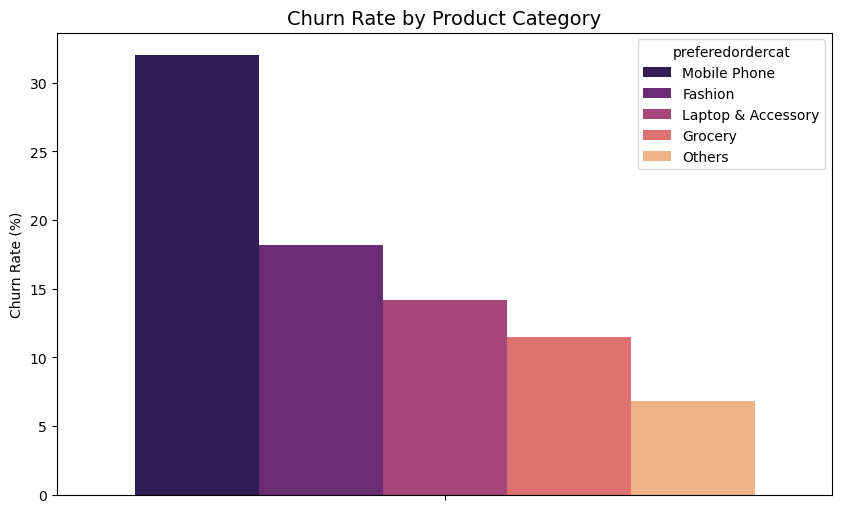

In [10]:
# Calculate Churn Rate by Category
category_churn = df.groupby('preferedordercat')['churn'].mean().sort_values(ascending=False) * 100

print(category_churn)

# Plot it
plt.figure(figsize=(10, 6))
sns.barplot(hue=category_churn.index, y=category_churn.values, palette='magma')
plt.title('Churn Rate by Product Category', fontsize=14)
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_30964\1197533292.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='preferredpaymentmode',


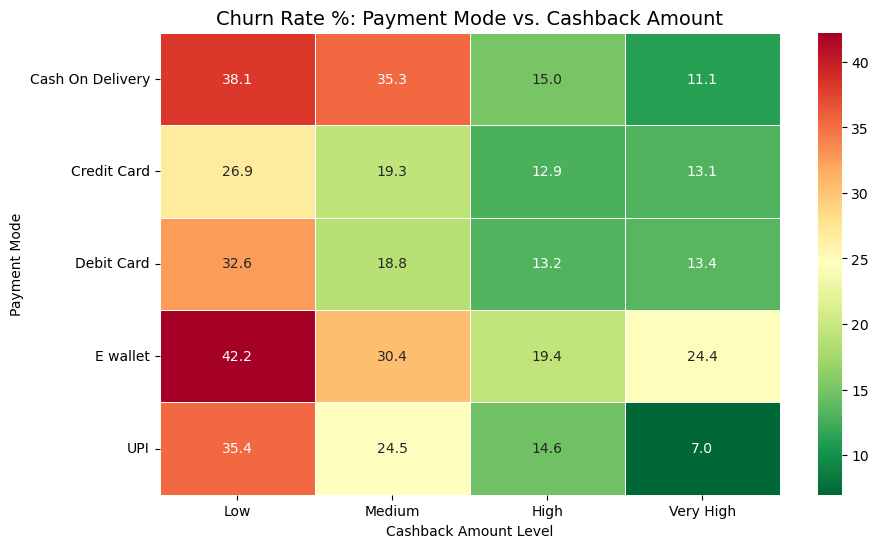

In [11]:

# We split cashback into 4 groups: Low, Medium, High, Very High
# This makes it easy to compare "what amount" leads to churn
df['cashback_level'] = pd.qcut(df['cashbackamount'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

heatmap_data = df.pivot_table(index='preferredpaymentmode', 
                              columns='cashback_level', 
                              values='churn', 
                              aggfunc='mean') * 100

# Plot the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='RdYlGn_r', linewidths=.5)

plt.title('Churn Rate %: Payment Mode vs. Cashback Amount', fontsize=14)
plt.ylabel('Payment Mode')
plt.xlabel('Cashback Amount Level')
plt.show()

**1. The "Danger Zone" (Red Boxes)**
**E-Wallet + Low Cashback (42.2% Churn):**
* The Insight: This is absolute worst-performing segment. Nearly half of the people who use E-Wallets (like Paytm/PhonePe wallets) and get low cashback leave.
* Why: Wallet users are often "deal hunters." If we don't give them a reward, they switch to another app immediately.

**Cash On Delivery + Low Cashback (38.1% Churn):**

The Insight: As predicted, COD users are low-commitment. If they don't get a good deal, they have no reason to stay.

**2. The "Safe Zone" (Green Boxes)**
**UPI + Very High Cashback (7.0% Churn):**
* The Insight: This is "Golden Segment." UPI users who are well-rewarded almost never leave. The churn rate drops from 35.4% (Low) to 7.0% (Very High)—a massive improvement.

**Credit Card Users (General Stability):**
* The Insight: Look at the "Credit Card" row. Even with Low Cashback, their churn is only 26.9% (much better than E-Wallet's 42.2%).
* Why: Credit card users are usually more financially stable and stickier. They value the service more than just the cashback.

**3. The "Strategic" Insight (The Trend)**
* The "Gradient" Effect: Look at how the colors shift from Red (Left) to Green (Right).
* The Lesson: Cashback works for everyone, but it works best for UPI and E-Wallet users.
* For COD Users: Even "Medium" cashback doesn't fix the problem (still 35.3% churn). This proves that throwing money at COD users is a waste of budget.
* For UPI Users: Throwing money works wonders (Drops churn by ~28%).